In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [5]:
def calc_prob_draw(num_whole, num_half, half_weight):
    """
    Calculates the probability that a half tablet will be drawn
    num_whole is the number of whole tablets
    num_half is the number of half tablets
    half_weight is a term to represent the relative probability of drawing a half tablet to a whole tablet
    """
    return num_half*half_weight/(num_half*half_weight+num_whole)

In [9]:
def draw_until_half(num_tabs, half_weight):
    """
    Function to simulate drawing pills from a bottle until a half tablet is drawn
    num_tabs is the number of tablets
    half_weight is the probability weighting of a half tablet
    returns the number of draws when the first half tablet was drawn
    """
    whole_tabs = num_tabs
    half_tabs = 0
    num_draws = 1
    while np.random.uniform() > calc_prob_draw(whole_tabs,half_tabs,half_weight):
        num_draws = num_draws+1
        whole_tabs = whole_tabs - 1
        half_tabs = half_tabs + 1
    return num_draws

In [10]:
def simulate_draws(num_tabs, num_samples, half_weight):
    """
    :param num_tabs: Number of tables in a bottle 
    :param num_samples: Number of times to sample drawing from a bottle
    :param half_weight: Probability weight of a half tablet
    :return: Average draws until a half tablet is drawn
    """
    samples = []
    for i in range(num_samples):
        samples = samples+[draw_until_half(num_tabs,half_weight)]
    return np.mean(samples)

In [23]:
number_of_tabs_in_problem = 100
number_of_samples = 10000
print('Average number of draws before drawing first half tablet: ',simulate_draws(number_of_tabs_in_problem,number_of_samples,1))


Average number of draws before drawing first half tablet:  13.1626


In [25]:
different_weights = [simulate_draws(number_of_tabs_in_problem,number_of_samples,(i+1)/50) for i in range(100)]
x_vals = [(i+1)/50 for i in range(100)]

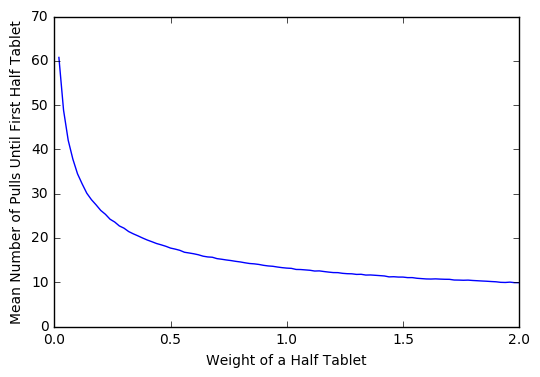

In [26]:
plt.plot(x_vals,different_weights)
plt.ylabel('Mean Number of Pulls Until First Half Tablet')
plt.xlabel('Weight of a Half Tablet')

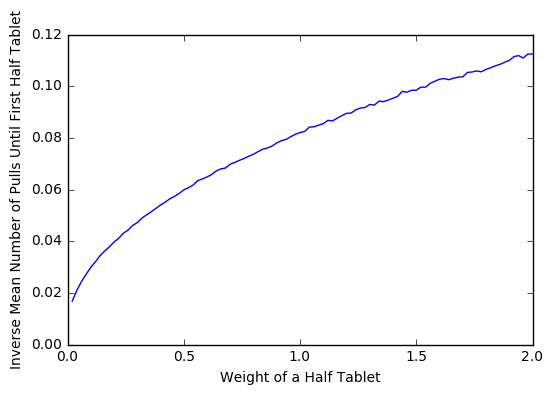

In [32]:
plt.plot(x_vals,[1/(i-1) for i in different_weights]) 
plt.ylabel('Inverse Mean Number of Pulls Until First Half Tablet')
plt.xlabel('Weight of a Half Tablet')